In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta = np.linspace(0, 2 * np.pi, 150)
radius = 55
SAT_len = 22
SAT_plane = 2

In [3]:
SATs = np.zeros((SAT_len*SAT_plane, 3, 150))
for i in range(SAT_len):
    SATs[i,0,:] = 65*i + radius * np.cos(theta)
    SATs[i,1,:] =  10  + radius * np.sin(theta)

    SATs[i + SAT_len,0,:] = -25 + 65*i + radius * np.cos(theta)
    SATs[i + SAT_len,1,:] =  10 +   65 + radius * np.sin(theta)

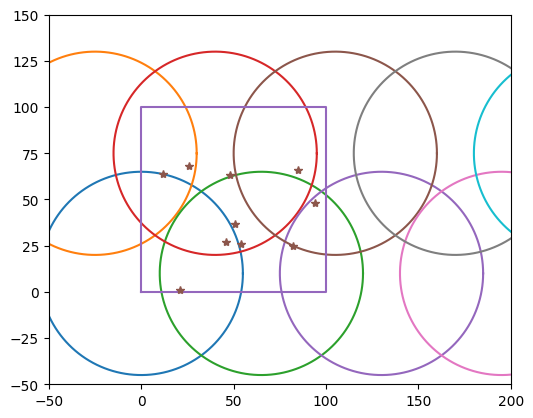

In [4]:
rect = [[0,0], [100,0], [0,100], [100,100]]

GS_size = 10
GSs = np.zeros((GS_size, 3))

for i in range(GS_size):
    GSs[i][0] = np.random.randint(0,100 + 1)
    GSs[i][1] = np.random.randint(0,100 + 1)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

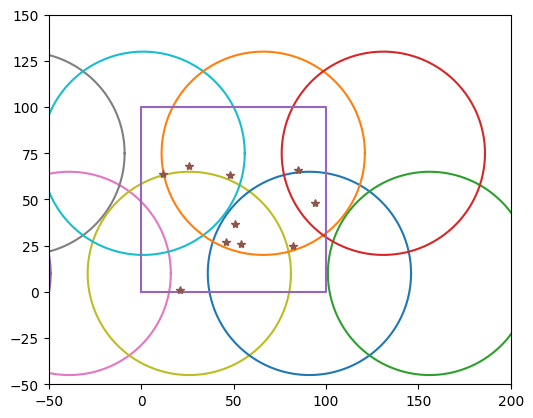

In [5]:
def SAT_location(SAT, SAT_len, time, speed, radius, theta):
    for i in range(SAT_len):
        SAT[i,0,:] = 65*i -speed * time + radius * np.cos(theta)
        SAT[i,1,:] =  10                + radius * np.sin(theta)

        SAT[i + SAT_len,0,:] = -25 + 65*i -speed * time + radius * np.cos(theta)
        SAT[i + SAT_len,1,:] =  10 +   65               + radius * np.sin(theta)
    
    return SAT

SATs = SAT_location(SATs, SAT_len=SAT_len, time=155, speed=7.8, radius=radius, theta=theta)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

In [6]:
SAT_coord = np.zeros((SAT_len*2,3))

def SAT_location_(SAT, SAT_len, time, speed):
    _SAT = SAT
    for i in range(SAT_len):
        _SAT[i,0] = 65*i -speed * time
        _SAT[i,1] = 10

        _SAT[i+SAT_len,0] = -25 + 65*i -speed * time
        _SAT[i+SAT_len,1] =  10 + 65
    
    return _SAT

SAT_coord = SAT_location_(SAT_coord, SAT_len=SAT_len, time=155, speed=7.8)

GS = GSs[:,0:2]
SAT = SAT_coord[:,0:2]

In [7]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])

print(dist)

[[1258.11684672 1193.17769004 1128.24554065 1063.32168228  998.40773234
   933.50575788  868.61844328  803.74933904  738.9032413   674.08678966
   609.30944519  544.58516322  479.93541232  415.39499275  351.02421569
   286.93727538  223.37860238  160.97515336  101.87246929   57.38466694
    68.24954212  120.30378215 1282.05616102 1217.05916044 1152.0624983
  1087.06623533 1022.07044767  957.07523215  892.08071384  827.08705709
   762.09448233  697.1032922   632.11391378  567.12696991  502.14340581
   437.16472868  372.19349806  307.23443817  242.297338    177.4063133
   112.64102272   48.50773134   21.63330765   83.86298349]
 [1260.28925251 1195.304982   1130.32252035 1065.34219854 1000.36443359
   935.38975834  870.41886469  805.45266776  740.49240374  675.53978417
   610.5972486   545.66839747  480.75877527  415.87738578  351.03988377
   286.27609051  221.65062599  157.33403955   93.96275858   36.79673899
    48.25971405  108.415866   1285.56174492 1220.59165981 1155.62493916
  1090.

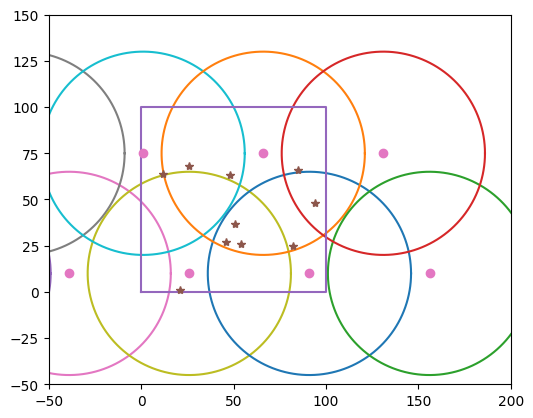

In [8]:
figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])
axes.plot(SAT_coord[:,0], SAT_coord[:,1], 'o')

plt.show()

In [13]:
print(SAT_len)

22


In [9]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])


coverage_indicator = np.zeros((GS_size, SAT_len*2))
coverage_index = np.where(dist <= radius)
coverage_indicator[coverage_index[:][0], coverage_index[:][1]] = 1
print(coverage_indicator)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [15]:
print(coverage_index)

(array([0, 0, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 9], dtype=int64), array([41, 42, 42, 41, 42, 20, 20, 42, 43, 19, 20, 42, 41, 42, 19, 42, 42,
       41], dtype=int64))


In [16]:
print(GS)

[[16. 92.]
 [59. 63.]
 [25. 94.]
 [92.  9.]
 [95. 55.]
 [59. 35.]
 [28. 74.]
 [51. 50.]
 [76. 70.]
 [ 4. 67.]]


In [10]:
def visible_time(SAT_point, SAT_speed, coverage_radius, GS):
    """
    return visible time btw SAT and GS
    """
    visible_time = (np.sqrt(coverage_radius ** 2 - (GS[1]-SAT_point[1]) ** 2) - GS[0] + SAT_point[0]) / SAT_speed
    visible_time = np.max((visible_time, 0))
    return visible_time

time = visible_time(SAT[0], SAT_speed=7.8, coverage_radius=radius, GS=GS[0])

In [12]:
#time = visible_time(SAT_coord[19], SAT_speed=7.8, coverage_radius=radius, GS=GS[0])
print(time)

0.0


In [1]:
a = [f"ground_station_{i}" for i in range(10)]
print(a)

['ground_station_0', 'ground_station_1', 'ground_station_2', 'ground_station_3', 'ground_station_4', 'ground_station_5', 'ground_station_6', 'ground_station_7', 'ground_station_8', 'ground_station_9']


In [2]:
a = [0,1,0,1,2,1,0,2]
a.count(1)

3